In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('predictive_maintenance.csv')



In [4]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [5]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [6]:
t = df['Failure Type'].unique()
t2 = df['Target'].unique()
t,t2


(array(['No Failure', 'Power Failure', 'Tool Wear Failure',
        'Overstrain Failure', 'Random Failures',
        'Heat Dissipation Failure'], dtype=object),
 array([0, 1], dtype=int64))

In [7]:
df.drop(['Product ID',"UDI",'Target'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 547.0+ KB


In [9]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df['encoded_type']= label_encoder.fit_transform(df['Type']) 
df['encoded_label']= label_encoder.fit_transform(df['Failure Type']) 




In [10]:
desired_first_column = 'encoded_label'

# Create a list of all other columns except 'ColumnA'
other_columns = [col for col in df.columns if col != desired_first_column]

new_column_order = [desired_first_column] + other_columns
df = df[new_column_order]
df.head()

,encoded_label,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,encoded_type
0,1,M,298.1,308.6,1551,42.8,0,No Failure,2
1,1,L,298.2,308.7,1408,46.3,3,No Failure,1
2,1,L,298.1,308.5,1498,49.4,5,No Failure,1
3,1,L,298.2,308.6,1433,39.5,7,No Failure,1
4,1,L,298.2,308.7,1408,40.0,9,No Failure,1


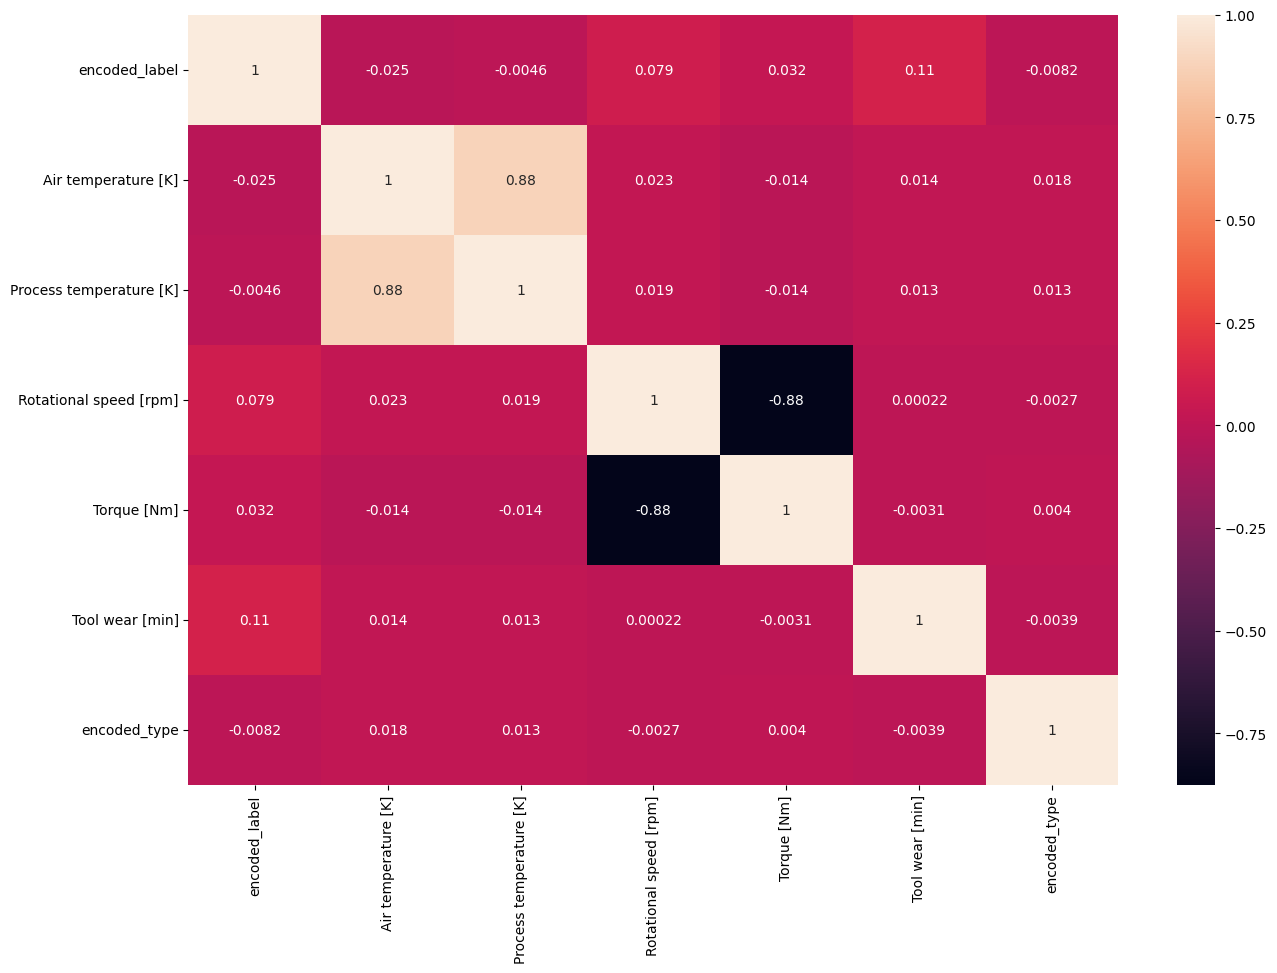

In [11]:
dft = df.drop(columns= ['Type','Failure Type'])
plt.figure(figsize=(15,10))
sns.heatmap(dft.corr(),annot = True)
plt.draw()

In [12]:
null = dft.isnull().sum()
dup = dft.duplicated().sum()
dup,null

(0,
 encoded_label              0
 Air temperature [K]        0
 Process temperature [K]    0
 Rotational speed [rpm]     0
 Torque [Nm]                0
 Tool wear [min]            0
 encoded_type               0
 dtype: int64)

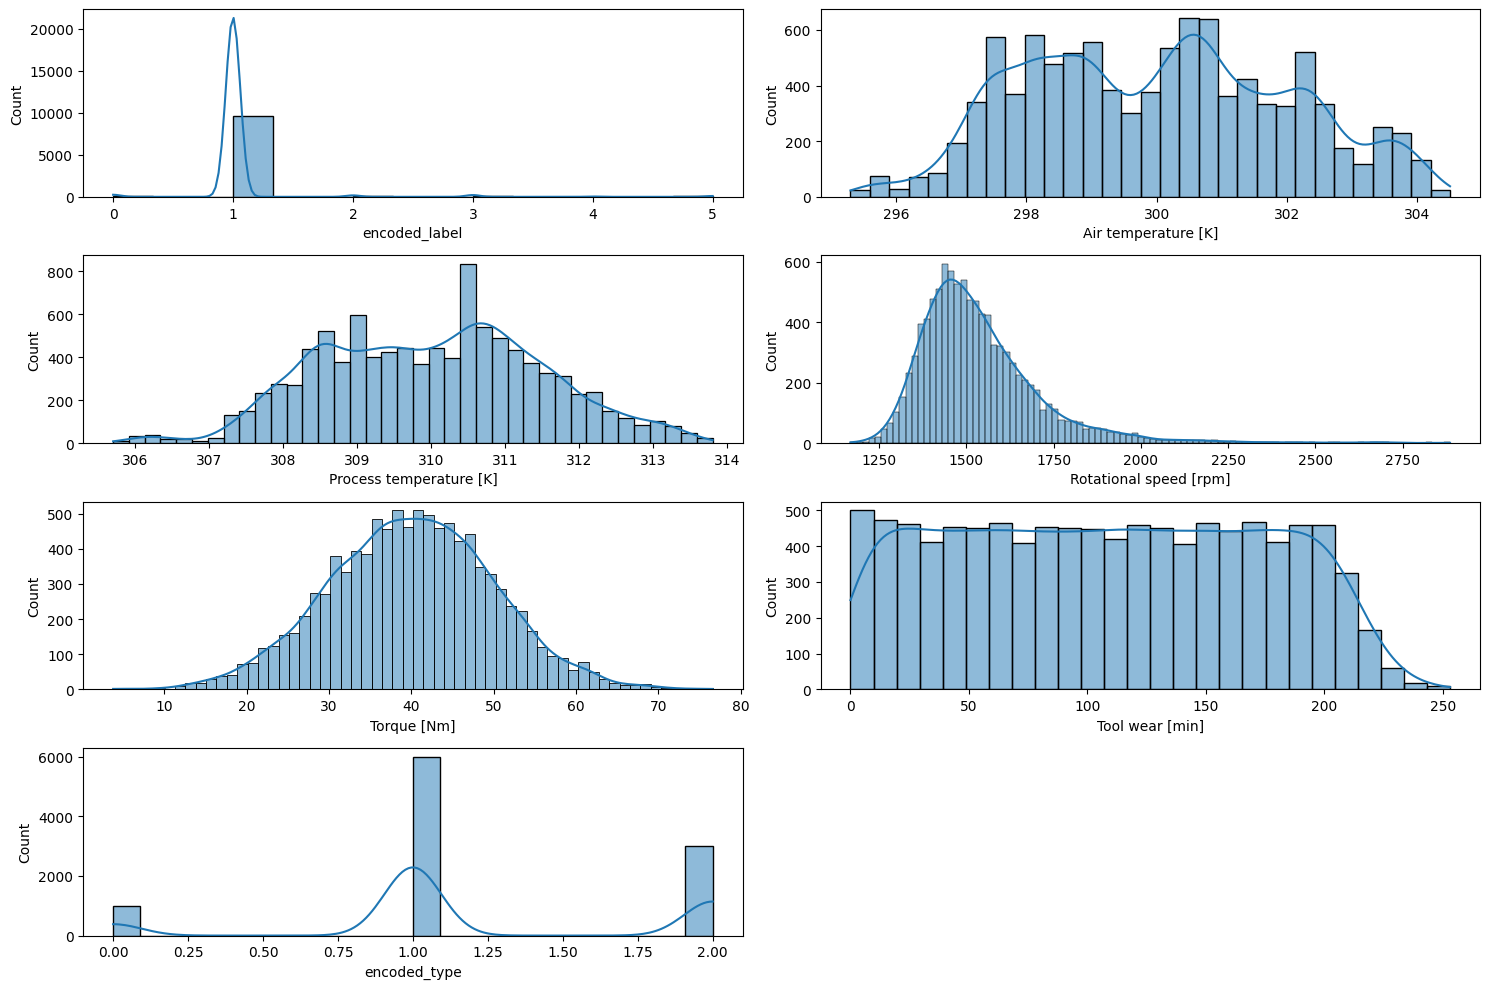

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
num_cols = len(dft.columns)
rows = (num_cols + 1) // 2  # Ensuring enough rows to handle odd numbers of columns
for i, col in enumerate(dft.columns, 1):
    plt.subplot(rows, 2, i)  # Adjusted to use the dynamic row calculation
    sns.histplot(dft[col], kde=True)
plt.tight_layout()
plt.show()


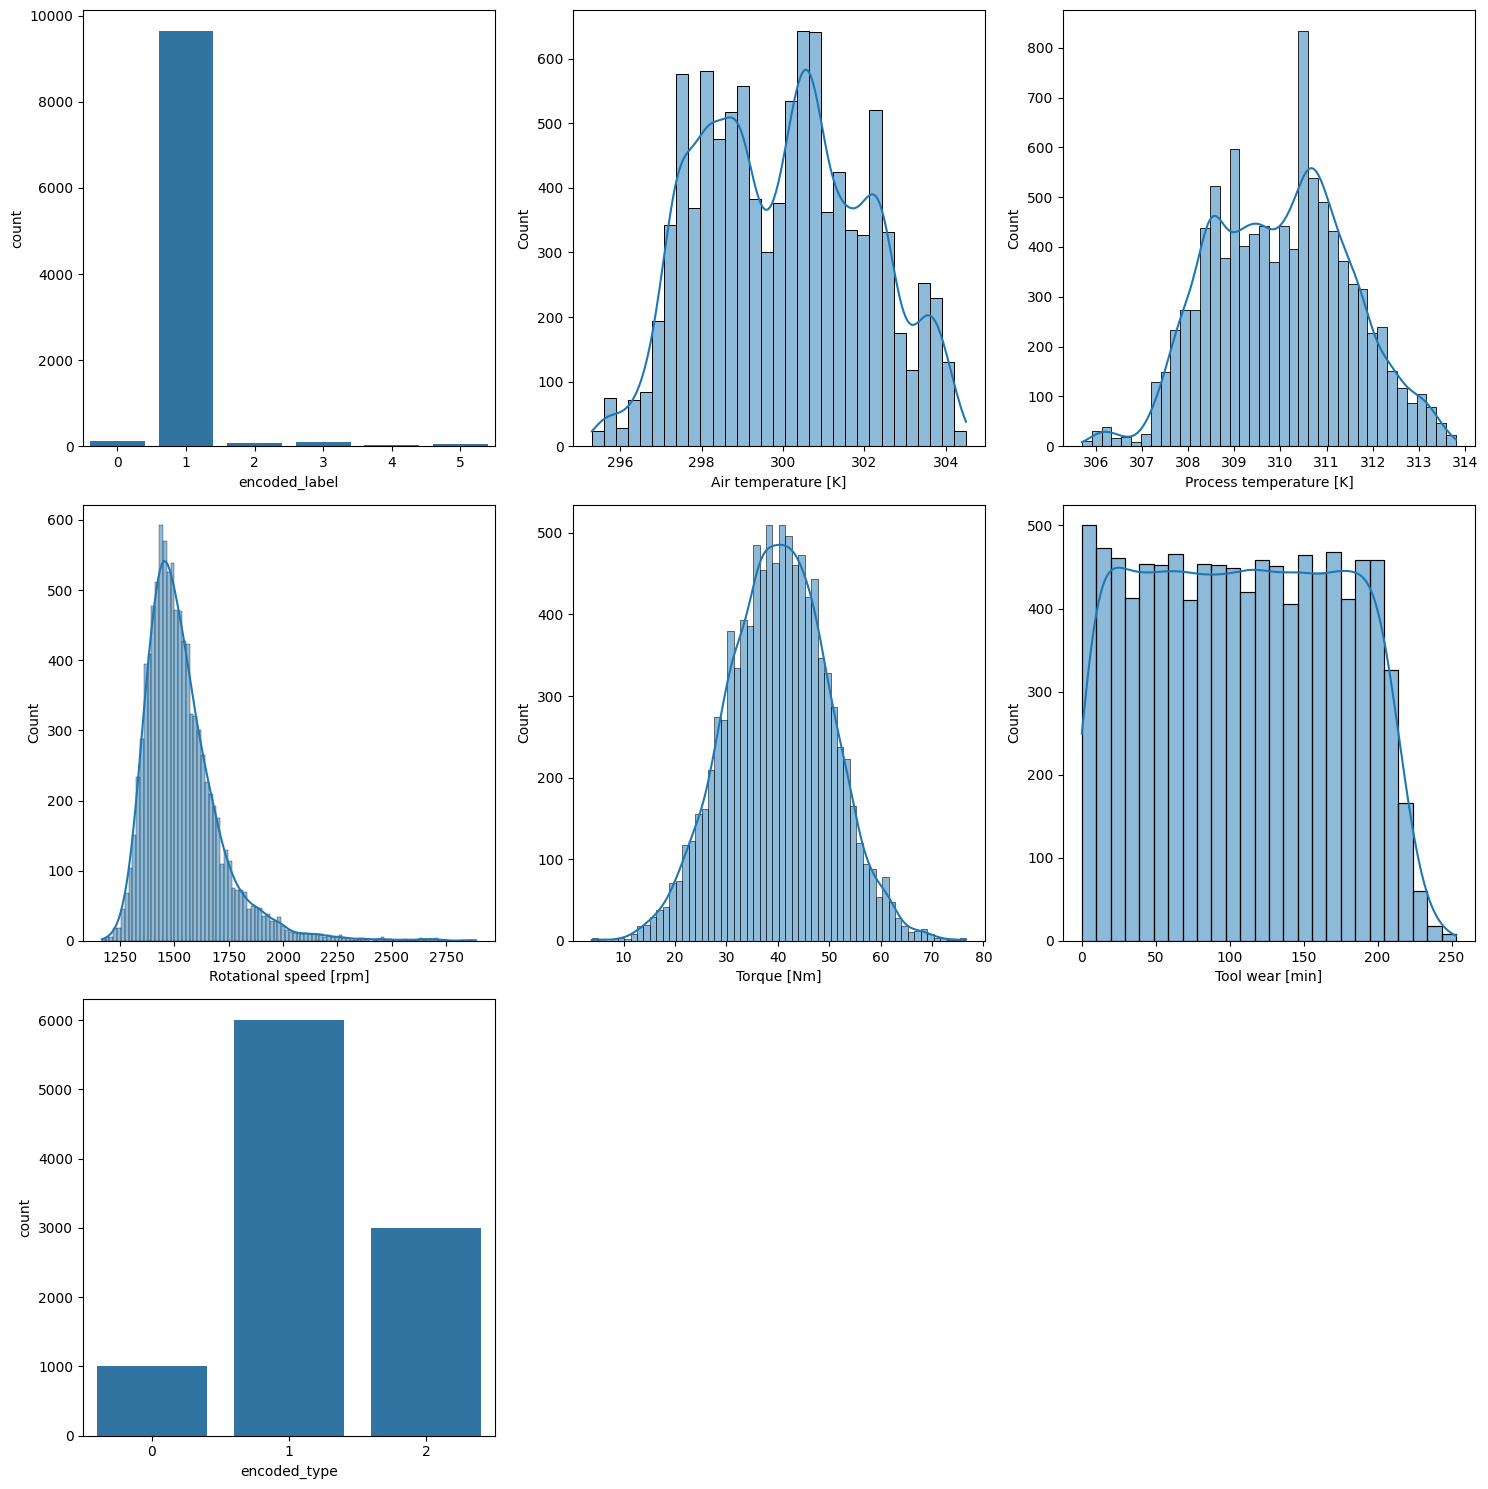

In [14]:
import math
num_columns = dft.shape[1]
num_rows = math.ceil(num_columns / 3)  # Adjust the number of rows based on your preference

plt.figure(figsize=(15, num_rows * 5))  # Adjust height based on number of rows

for i, col in enumerate(dft.columns):
    plt.subplot(num_rows, 3, i + 1)  # Position each subplot
    if dft[col].dtype in ['int64', 'float64']:  # Check if the column is numeric
        sns.histplot(dft[col], kde=True)
    else:
        sns.countplot(x=dft[col])  # For categorical data, a countplot might be more appropriate

plt.tight_layout()
plt.show()

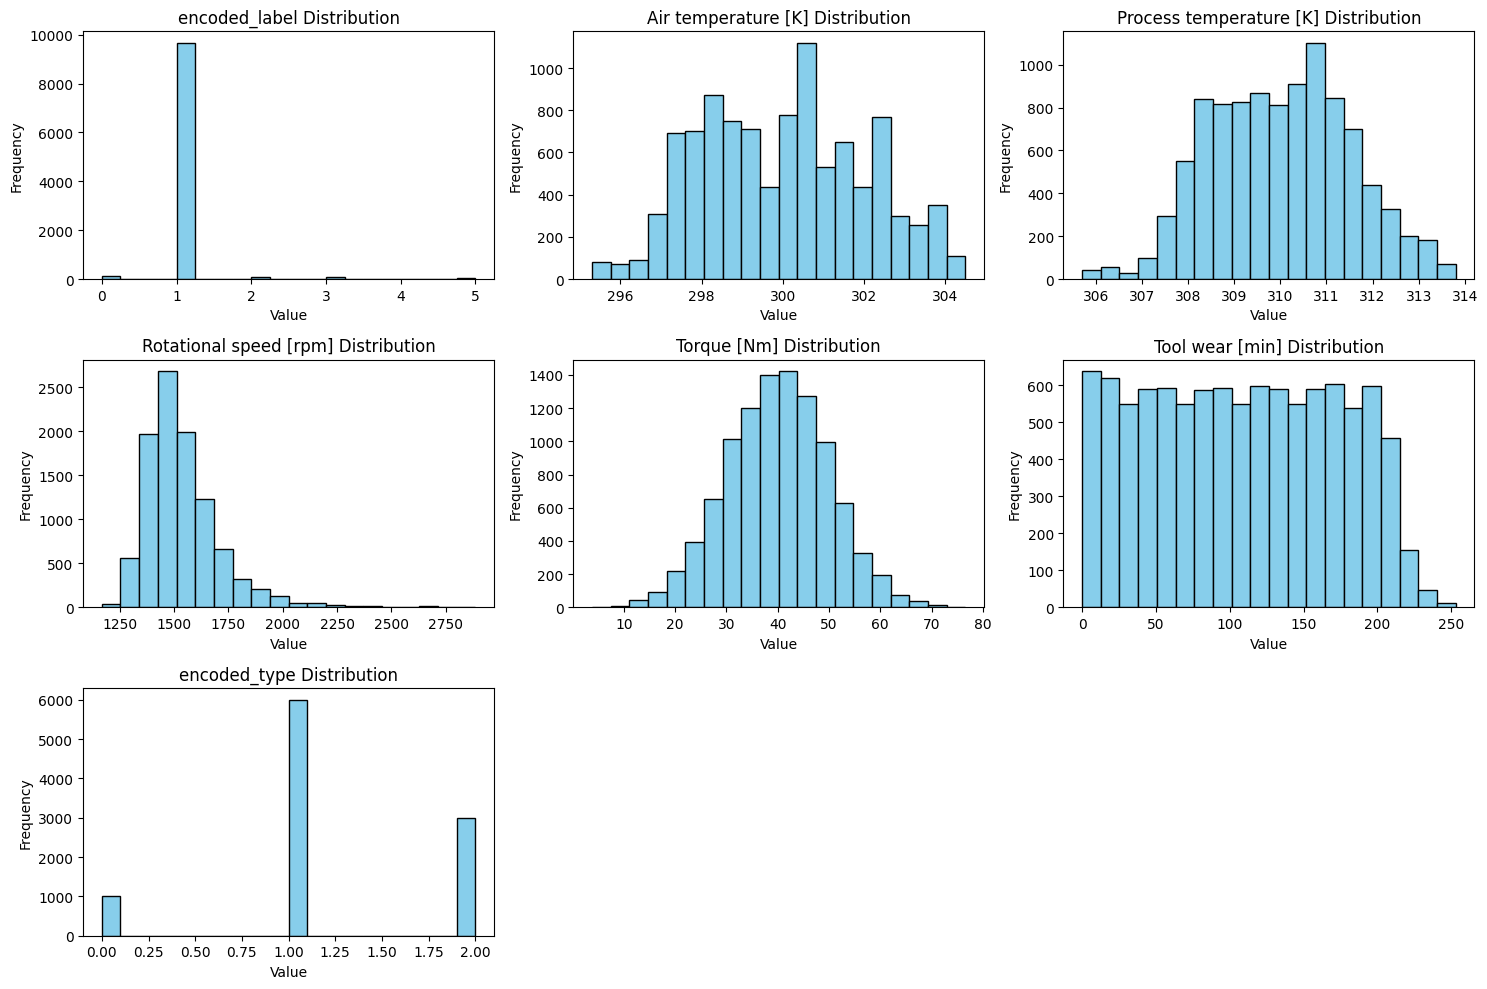

In [15]:
axes = dft.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')

# Iterate over each subplot to customize
for ax in axes.flatten():
    if ax:
        ax.set_xlabel('Value')  # Set the x-axis label
        ax.set_ylabel('Frequency')  # Set the y-axis label
        ax.grid(False)  # Turn off the grid to make it less cluttered
        ax.set_title(ax.get_title() + ' Distribution')  # Append 'Distribution' to each title for clarity

plt.tight_layout()
plt.show()

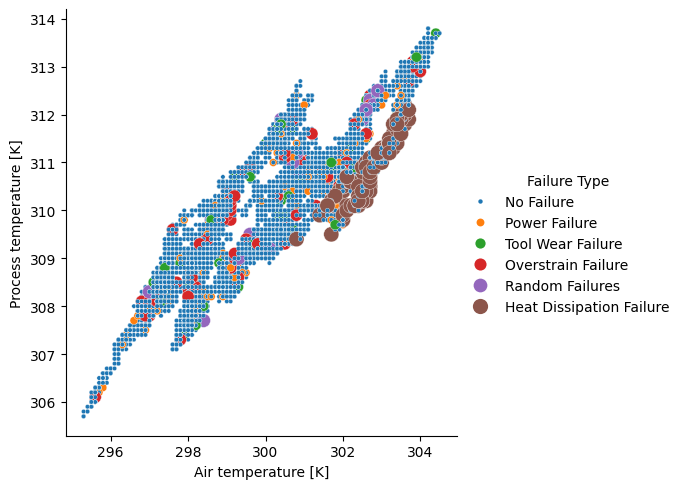

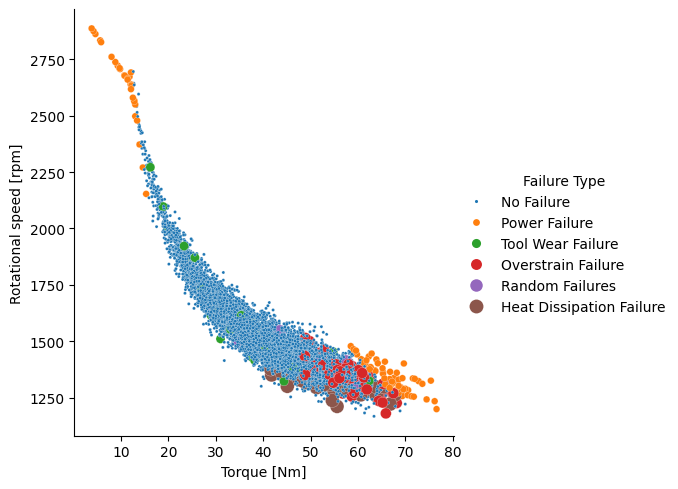

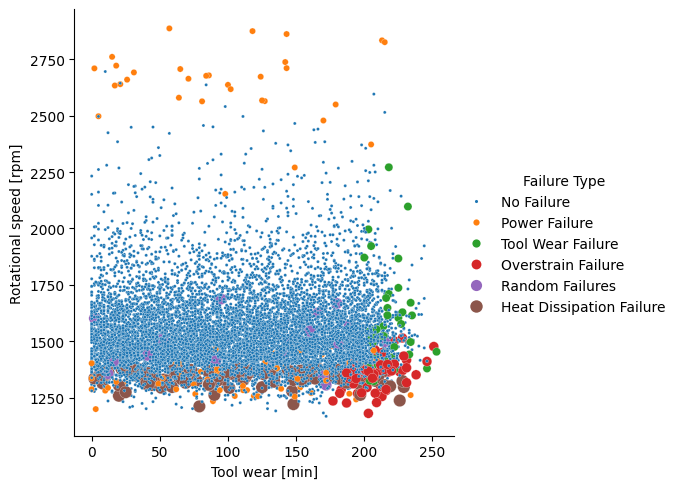

In [16]:
a = sns.relplot(x="Air temperature [K]", y="Process temperature [K]", hue="Failure Type",size="Failure Type", sizes=(120, 10),data=df)
b = sns.relplot(x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",size="Failure Type", sizes=(100, 5),data=df)
c = sns.relplot(x="Tool wear [min]", 
                y="Rotational speed [rpm]", 
                hue="Failure Type",
                size="Failure Type", 
                sizes=(80, 5), 
                data=df)
    

In [18]:
df["Failure Type"].replace({"No Failure": 0,"Heat Dissipation Failure": 1,"Power Failure": 2,"Overstrain Failure": 3,"Tool Wear Failure": 4,"Random Failures": 5},inplace=True)
df.head()    

,encoded_label,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,encoded_type
0,1,M,298.1,308.6,1551,42.8,0,0,2
1,1,L,298.2,308.7,1408,46.3,3,0,1
2,1,L,298.1,308.5,1498,49.4,5,0,1
3,1,L,298.2,308.6,1433,39.5,7,0,1
4,1,L,298.2,308.7,1408,40.0,9,0,1
